# Import datasets

In [21]:
import pandas as pd

In [22]:
popularity = pd.read_csv("steamcharts.csv")
appdata = pd.read_csv("steam_app_data.csv", dtype={10: "string"})
headers = pd.read_csv("id_name.csv")

# Keep only rows that we have player data for

**Part of the cleaning process, does nothing the second time around**

In [23]:
usable_ids = popularity['steam_appid'].unique()

In [24]:
appdata = appdata[appdata['steam_appid'].isin(usable_ids)]
headers = headers[headers['appid'].isin(usable_ids)]

## Write the changes back to file - save space

In [25]:
appdata.to_csv('steam_app_data.csv', index=False)
headers.to_csv('id_name.csv', index=False)

In [26]:
appdata.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

In [27]:
popularity.columns

Index(['month', 'avg_players', 'gain', 'gain_percent', 'peak_players', 'name',
       'steam_appid'],
      dtype='object')

In [28]:
#Removing columns that will not be of use
appdata = appdata.drop(['name','dlc', 'detailed_description', 'about_the_game','short_description',
                        'fullgame','header_image','website', 'pc_requirements', 'mac_requirements','linux_requirements','legal_notice',
                        'drm_notice', 'ext_user_account_notice', 'demos', 'price_overview',
                        'packages', 'package_groups', 'reviews','screenshots','movies', 'achievements', 'controller_support', 'metacritic',
                        'support_info', 'background','content_descriptors', 'recommendations'], axis=1)
popularity = popularity.drop(['name', 'gain'],  axis=1)

In [29]:
appdata.columns

Index(['type', 'steam_appid', 'required_age', 'is_free', 'supported_languages',
       'developers', 'publishers', 'platforms', 'categories', 'genres',
       'release_date'],
      dtype='object')

In [30]:
#Changing data types
popularity['month'] = pd.to_datetime(popularity['month'], format='%b-%y')
#In case it interprets 25 as 1925 and not 2025
popularity.loc[popularity['month'].dt.year < 2000, 'month'] += pd.DateOffset(years=100)

# Merging datasets

In [31]:
headers.head()

,appid,name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [32]:
popularity.head()

,month,avg_players,gain_percent,peak_players,steam_appid
0,2025-09-01,7805.25,0.1276,13254,10
1,2025-08-01,6922.13,-0.0610,12168,10
2,2025-07-01,7371.48,-0.1016,13951,10
3,2025-06-01,8204.98,-0.0936,15798,10
4,2025-05-01,9052.51,-0.0495,15333,10


In [33]:
appdata.head()

,type,steam_appid,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date
0,game,10,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,game,20,0.0,False,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}"
2,game,30,0.0,False,"English, French, German, Italian, Spanish - Spain",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}"
3,game,40,0.0,False,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Jun, 2001'}"
4,game,50,0.0,False,"English, French, German, Korean",['Gearbox Software'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 1999'}"


In [34]:
main = (
    popularity
        .merge(headers, left_on='steam_appid', right_on='appid', how='left')
        .merge(appdata, on='steam_appid', how='left')
)

main = main.drop(columns='appid')
main.head()



,month,avg_players,gain_percent,peak_players,steam_appid,name,type,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date
0,2025-09-01,7805.25,0.1276,13254,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,2025-08-01,6922.13,-0.0610,12168,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
2,2025-07-01,7371.48,-0.1016,13951,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
3,2025-06-01,8204.98,-0.0936,15798,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"
4,2025-05-01,9052.51,-0.0495,15333,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}"


In [35]:
import re

def clean_languages(cell):
    if pd.isna(cell):
        return []
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', cell)
    # Remove extra notes like "*languages with full audio support"
    text = re.sub(r'\*.*languages with full audio support', '', text, flags=re.IGNORECASE)
    languages = [lang.strip() for lang in text.split(',') if lang.strip()]
    # Split by comma
    return languages

# Apply cleaning
main['supported_languages_clean'] = main['supported_languages'].apply(clean_languages)

# Flatten all lists to get unique languages
all_languages = [lang for sublist in main['supported_languages_clean'] for lang in sublist]
unique_languages = sorted(set(all_languages))

print(unique_languages)

['#lang_slovakian', 'Afrikaans', 'Albanian', 'Alemán', 'Alemán*', 'Alemão', 'Alemão*', 'Allemand', 'Allemand*', 'Amharic', 'Angielski', 'Angielski*', 'Anglais', 'Anglais*', 'Anglais**Langues avec support audio complet', 'Angol*', 'Arabic', 'Arabisch', 'Armenian', 'Assamese', 'Azerbaijani', 'Bangla', 'Basque', 'Belarusian', 'Bhs. Belanda', 'Bhs. Ceko*bahasa dengan dukungan audio penuh', 'Bhs. Inggris*', 'Bhs. Italia*', 'Bhs. Jepang*', 'Bhs. Jerman*', 'Bhs. Korea', 'Bhs. Polandia', 'Bhs. Portugis - Brasil*', 'Bhs. Prancis*', 'Bhs. Rusia*', 'Bhs. Spanyol - Spanyol*', 'Bhs. Tionghoa Sederhana', 'Bhs. Tionghoa Tradisional', 'Bosnian', 'Brasilianisches Portugiesisch', 'Brasilianisches Portugiesisch*', 'Brasilianisches Portugiesisch*Sprachen mit voller Audiounterstützung', 'Brazíliai portugál', 'Bulgarian', 'Bułgarski', 'Búlgaro', 'Catalan', 'Ceco*lingue con supporto audio completo', 'Checo', 'Checo*idiomas con localización de audio', 'Cherokee', 'Chinesisch (traditionell)', 'Chinesisch (trad

In [36]:
allowed_tags = ['English', 'Spanish', 'French', 'German', 'Russian', 'Chinese', 'Japanese', 'Italian', 'Finnish', 'Estonian', 'Swedish']

# Filter rows where 'tags' list contains any allowed_tags
main['supported_languages_clean'] = main['supported_languages_clean'].apply(
    lambda lst: [tag for tag in lst if tag in allowed_tags]
)

main.head()

,month,avg_players,gain_percent,peak_players,steam_appid,name,type,required_age,is_free,supported_languages,developers,publishers,platforms,categories,genres,release_date,supported_languages_clean
0,2025-09-01,7805.25,0.1276,13254,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
1,2025-08-01,6922.13,-0.0610,12168,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
2,2025-07-01,7371.48,-0.1016,13951,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
3,2025-06-01,8204.98,-0.0936,15798,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]
4,2025-05-01,9052.51,-0.0495,15333,10,Counter-Strike,game,0.0,False,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}",[English]


In [37]:
popularity['month'].value_counts()

month
2019-04-01    6029
2019-08-01    6022
2019-07-01    6006
2019-06-01    5973
2019-05-01    5936
              ... 
2012-11-01     975
2012-10-01     946
2012-09-01     911
2012-08-01     886
2012-07-01     860
Name: count, Length: 159, dtype: int64

In [38]:
main['release_date'].value_counts()
#main["release_date"].iloc[0]

release_date
{'coming_soon': False, 'date': ''}                7677
{'coming_soon': False, 'date': '30 Aug, 2006'}    2191
{'coming_soon': False, 'date': '24 Aug, 2009'}    1908
{'coming_soon': False, 'date': '5 Apr, 2016'}     1683
{'coming_soon': False, 'date': '15 May, 2014'}    1624
                                                  ... 
{'coming_soon': False, 'date': '4 Aug, 2019'}        1
{'coming_soon': False, 'date': '2 Jul, 2019'}        1
{'coming_soon': False, 'date': '24 Jan, 2020'}       1
{'coming_soon': False, 'date': '7 Aug, 2019'}        1
{'coming_soon': False, 'date': '27 Jan, 2018'}       1
Name: count, Length: 2675, dtype: int64

## Cleaning release date

In [39]:
import ast

main["release_date"] = main["release_date"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [40]:
main["release_date"] = pd.to_datetime(
    main["release_date"].apply(lambda x: x.get("date") if isinstance(x, dict) else None),
    format="%d %b, %Y",
    errors="coerce"
)


## Cleaning categories and genres

In [42]:
#Makinga list from genres
def to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    elif isinstance(x, list):
        return x
    return []

def extract_genres(x):
    if isinstance(x, list):
        return [d.get('description') for d in x if isinstance(d, dict)]
    else:
        return []   # handle NaN or wrong format

In [43]:
main['genres_parsed'] = main['genres'].apply(to_list)

main['genres_clean'] = main['genres_parsed'].apply(extract_genres)
main['genres_clean']

0            [Action]
1            [Action]
2            [Action]
3            [Action]
4            [Action]
             ...     
660351    [Adventure]
660352    [Adventure]
660353    [Adventure]
660354    [Adventure]
660355    [Adventure]
Name: genres_clean, Length: 660356, dtype: object

In [44]:
main['categories_parsed'] = main['categories'].apply(to_list)
main['categories_clean'] = main['categories_parsed'].apply(extract_genres)
main['categories_clean']

0         [Multi-player, PvP, Online PvP, Shared/Split S...
1         [Multi-player, PvP, Online PvP, Shared/Split S...
2         [Multi-player, PvP, Online PvP, Shared/Split S...
3         [Multi-player, PvP, Online PvP, Shared/Split S...
4         [Multi-player, PvP, Online PvP, Shared/Split S...
                                ...                        
660351    [Single-player, Steam Achievements, Steam Trad...
660352    [Single-player, Steam Achievements, Steam Trad...
660353    [Single-player, Steam Achievements, Steam Trad...
660354    [Single-player, Steam Achievements, Steam Trad...
660355    [Single-player, Steam Achievements, Steam Trad...
Name: categories_clean, Length: 660356, dtype: object

## Classifying success tier through player

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Aggregate per game
agg_pop = popularity.groupby('steam_appid').agg(
    avg_players_mean=('avg_players', 'mean'),
    peak_players_max=('peak_players', 'max'),
    gain_percent_mean=('gain_percent', 'mean')
).reset_index()

scaler = MinMaxScaler()

agg_pop[['avg_norm', 'peak_norm', 'gain_norm']] = scaler.fit_transform(
    agg_pop[['avg_players_mean', 'peak_players_max', 'gain_percent_mean']]
)

agg_pop['success_score'] = (
    0.5 * agg_pop['peak_norm'] +
    0.3 * agg_pop['avg_norm'] +
    0.2 * agg_pop['gain_norm']
)

agg_pop['tier'] = pd.qcut(agg_pop['success_score'], q=[0, 0.4, 0.7, 0.9, 1.0],
                         labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

In [46]:
tiers = (
    agg_pop
        .merge(headers, left_on='steam_appid', right_on='appid', how='left')
)
platinum_games = tiers[tiers['tier'] == 'Platinum']

pd.set_option('display.max_rows', None)
platinum_games[['name', 'tier']]

,name,tier
0,Counter-Strike,Platinum
6,Half-Life,Platinum
9,Half-Life 2,Platinum
10,Counter-Strike: Source,Platinum
18,Team Fortress 2,Platinum
20,Left 4 Dead 2,Platinum
21,Portal 2,Platinum
22,Alien Swarm,Platinum
23,Counter-Strike: Global Offensive,Platinum
24,Killing Floor,Platinum


In [47]:
# Print row 691
print(platinum_games.loc[691])

steam_appid               56400
avg_players_mean     465.244465
peak_players_max           6617
gain_percent_mean      0.003428
avg_norm               0.000986
peak_norm              0.002045
gain_norm              0.000023
success_score          0.001323
tier                   Platinum
appid                       NaN
name                        NaN
Name: 691, dtype: object


## Finding what correlates with popularity

In [50]:
#First we need to merge the success score and tier into our dataframe

In [51]:
main = main.merge(
    agg_pop[['steam_appid', 'success_score']], 
    on='steam_appid', 
    how='left'
)

main = main.merge(
    agg_pop[['steam_appid', 'tier']], 
    on='steam_appid', 
    how='left'
)

In [52]:
#Then we create numeric versions of important features

In [53]:
main['num_languages'] = main['supported_languages_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)
main['num_genres'] = main['genres_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)
main['num_categories'] = main['categories_clean'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [54]:
#Now we'll select only numeric columns for correlation heatmap

In [55]:
numeric_cols = [
    'avg_players', 
    'gain_percent',
    'peak_players',
    'required_age',
    'is_free',
    'num_languages',
    'num_genres',
    'num_categories',
    'success_score'
]

In [56]:
#Computing correlation matrix and heatmap

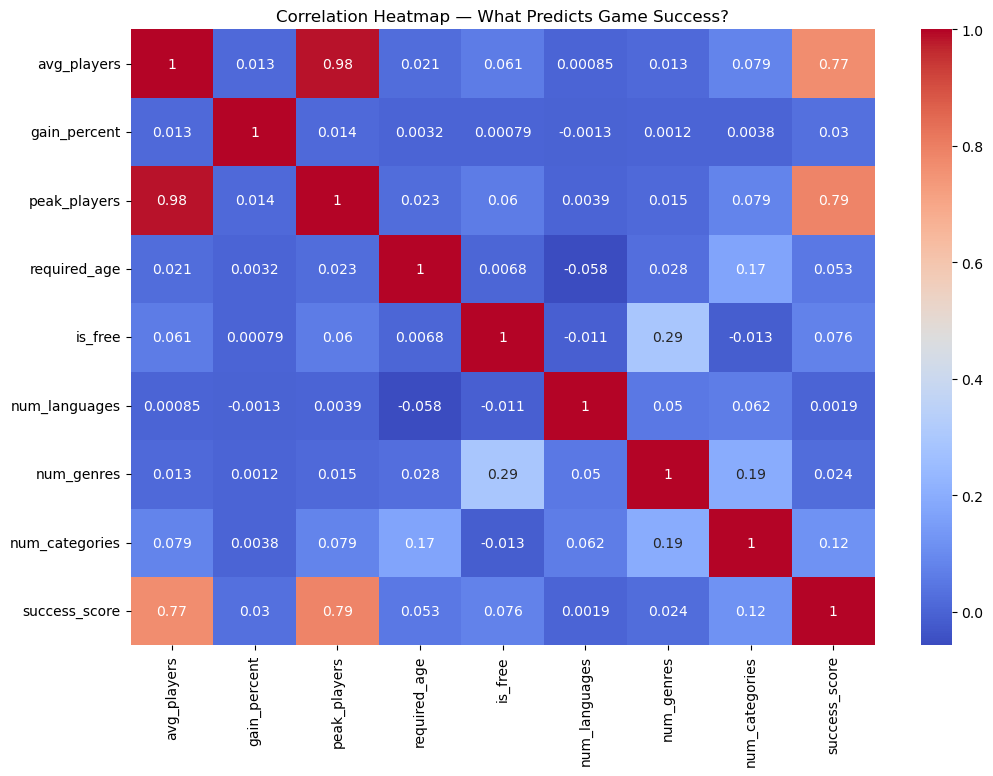

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = main[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — What Predicts Game Success?")
plt.show()


In [58]:
#This should give us strong/weak indicators of success


In [59]:
# Genre -> success correlation

In [60]:
genres_dummies = (
    main['genres_clean']
        .explode()
        .str.get_dummies()
        .groupby(level=0)
        .sum()
)

genre_success_corr = (
    genres_dummies.join(main['success_score'])
        .corr()['success_score']
        .sort_values(ascending=False)
)

print("Genre correlations with success:\n")
print(genre_success_corr)

Genre correlations with success:

success_score                        1.000000
Free to Play                         0.398940
Akcja                                0.392551
Massively Multiplayer                0.065331
Simuladores                          0.050272
Free To Play                         0.047058
角色扮演                                 0.040181
Rol                                  0.035896
Acción                               0.034858
冒险                                   0.033837
策略                                   0.031656
Aksi                                 0.030763
Action                               0.029762
动作                                   0.029032
Стратегии                            0.028883
Симуляторы                           0.028214
Abenteuer                            0.022000
模拟                                   0.017211
Symulacje                            0.016938
Sportowe                             0.016938
Wczesny dostęp                       0.016938


In [61]:
# Categories -> success correlation

In [ ]:
categories_dummies = (
    main['categories_clean']
        .explode()
        .str.get_dummies()
        .groupby(level=0)
        .sum()
)

category_success_corr = (
    categories_dummies.join(main['success_score'])
        .corr()['success_score']
        .sort_values(ascending=False)
)

print("Category correlations with success:\n")
print(category_success_corr)

In [ ]:
# Publisher influence

In [ ]:
publisher_success = (
    main.groupby('publishers')['success_score']
        .mean()
        .sort_values(ascending=False)
)

print("Top publishers by average success score:\n")
print(publisher_success.head(20))

In [ ]:
# Free-to-play vs paid

In [ ]:
ftf = main.groupby('is_free')['success_score'].mean()
print("Free vs Paid success:\n", ftf)